<div align="center">
    <div>
        <img src="../../images/isel_logo.png" width="200" height="200" align="left">
    </div>
    <div>
        <h1>Área Departamental de Engenharia de Eletrónica e Telecomunicações e de Computadores</h1>
        <p>Trabalho prático 1</p>
        <p>Authors:	44598	André L. A. Q. de Oliveira</p>
        <p>Unidade Curricular Compressão de Sinais Multimédia</p>
        <p>Professor: André Lourenço</p>
        <p>11 – April – 2021</p>
    </div>
</div>

<div class="alert alert-block alert-warning">
This is a yellow background
</div>

<a id="index"></a>
# Index
- [Exercício 1](#exercicio_1)
- [Exercício 2](#exercicio_2)
- [Exercício 3](#exercicio_3)
- [Exercício 4](#exercicio_4)
- [Exercício 5](#exercicio_5)
- [Exercício 6](#exercicio_6)
- [Exercício 7](#exercicio_7)
- [Exercício 8](#exercicio_8)

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

cwd = os.getcwd() # current work diretory

 <a id="exercicio_1"></a>
 
 # Exercício 1
 
<div class="alert alert-block alert-info">
Abra o ficheiro com a imagem "lenac.tif"e apresente a imagem. Verifique para que servem os métodos "dtype"e "shape".
</div>

**image.dtype**
- Retorna o tipo da imagem.

**image.shape**
- Permite aceder ao formato da imagem. 
- Retorna uma tupla de número de linhas, colunas e número de canais (se a imagem for colorida).

In [43]:
x_img = cv2.imread(f"{cwd}/images/lenac.tif")
# cv2.imshow("Original Image", x_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print(f" O tipo da imagem lenac.tif é {x_img.dtype}")
print(f" A imagem lenac.tif apresenta a seguinte estrutura física: {x_img.shape}")

 O tipo da imagem lenac.tif é uint8
 A imagem lenac.tif apresenta a seguinte estrutura física: (512, 512, 3)


[back to index](#index)

<a id="exercicio_2"></a>

# Exercício 2

<div class="alert alert-block alert-info">
Grave a mesma imagem, mas agora em formato "JPEG" com diferentes qualidades. Verifique visualmente a qualidade das imagens assim como o tamanho do ficheiro. Produza o código para calcular a taxa de compressão, a SNR e a PSNR.
</div>

In [42]:
lenac_path = f"{cwd}/images/lenac.tif"
file1_path = f"{cwd}/images/file1.jpg"
file2_path = f"{cwd}/images/file2.jpg"

cv2.imwrite(file1_path, x_img, (cv2.IMWRITE_JPEG_QUALITY, 80));
cv2.imwrite(file2_path, x_img, (cv2.IMWRITE_JPEG_QUALITY, 10));

print(f"A imagem lenac.tif tem {os.stat(lenac_path).st_size} bytes")
print(f"A imagem file1.jpg tem {os.stat(file1_path).st_size} bytes")
print(f"A imagem file2.jpg tem {os.stat(file2_path).st_size} bytes")

A imagem lenac.tif tem 786572 bytes
A imagem file1.jpg tem 44124 bytes
A imagem file2.jpg tem 9566 bytes


Como seria de esperar a imagem **file1.jpg** e **file2.jpg** têm um tamanho inferior quando comparado com a imagem original **lenac.tif**. Tal já seria de esperar, uma vez que as novas imagens foram gravadas em formato jpeg, onde é efectuada uma compressão do tipo lossy, que resulta geralmente numa compressão de 10:1 com perdas visíveis na qualidade da imagem.

Comparando imagens **file1.jpg** e **file2.jpg**, também existem diferenças significativas tanto na dimensão como na qualidade, uma vez que na imagem file2.jpg foi aplicado um ratio de compressão mais elevado.

$$ SNR = \frac{1}{MN} $$

$$ MSE = \frac{1}{MN} $$

$$ PSNR = \frac{1}{MN} $$

In [8]:
def SNRdb(img1, img2):
    pe = np.sum( (img1-img2)**2 ) / len(img1)
    pxa = np.sum(image2**2) / len(img2)
    return 10*np.log10(Pxa / pe)

def MSE(img1, img2):
    return np.sum( (img1 - img2)**2 ) / len(img1)

def PSNR(img1, img2):
    MaxI = np.max(img1)
    return 10 * np.log10(MaxI / MSE(img1, img2))

[back to index](#index)

<a id="exercicio_3"></a>

# Exercício 3

<div class="alert alert-block alert-info">
Converta a imagem que está na variável x_img para níveis de cinzento, usando o método "cvtColor"e grave o resultado. Este método aplica a transformação Y = R x 299=1000 + G x 587=1000 + B x 114=1000, justifique a utilização desta equação. Verifique também o tamanho do ficheiro e compare-o com o ficheiro original.
</div>

In [100]:
x_img_g = cv2.cvtColor(x_img, cv2.COLOR_BGR2GRAY)
# cv2.imshow("Gray Image", x_img_g)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

file3_path = f"{cwd}/images/file3.bmp"
cv2.imwrite(f"{cwd}/images/file3.bmp", x_img_g);

[back to index](#index)

<a id="exercicio_4"></a>

# Exercício 4

<div class="alert alert-block alert-info">
Apresente o histograma da imagem (em tons de cinzento) que está na variável x_img_g. Verifique quantos níveis de cinzento tem a imagem.
</div>

A imagem x_img_g apresenta 215 níveis de cinzento


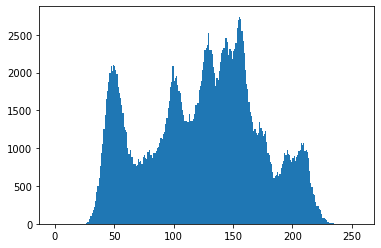

In [50]:
plt.hist(x_img_g.ravel(), 256, [0, 256]);
print(f"A imagem x_img_g apresenta {len(np.unique(x_img_g.ravel()))} níveis de cinzento")

[back to index](#index)

<a id="exercicio_5"></a>
 
# Exercício 5
 
<div class="alert alert-block alert-info">
Nos próximos trabalhos será necessário realizar operações com os valores de cada pixel. Para este efeito pode-se transformar a imagem para um array. O código seguinte representa o pixel mais significante da imagem. Apresente oito imagens, cada uma com o valor de cada bit para todos os pixeis.
</div>

In [45]:
for x in range(0,200,25):
    cv2.imshow(f"BW-{x}", (x_img_g > x) * 1.0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Ao aplicar um threshold a uma imagem com um determinado valor, cria-se uma imagem "binária", onde com o valor 1 estarão representado todos os pixels que resultam da condição verdadeira da operação treshold aplicada, e os restante com o valor 0.


[back to index](#index)

<a id="exercicio_6"></a>
 
# Exercício 6

<div class="alert alert-block alert-info">
Construa uma função que realize o algoritmo de dithering Floyd Steinberg. Esta função recebe uma matrix (com os pixeis em tons de cinzento) e devolve uma matrix com valores a preto e branco. Este algoritmo aproxima cada pixel da imagem (x) ao valor mais próximo (preto ou branco) e o erro é difundido para os pixeis adjacentes seguindo o método:

Aplique esta função à imagem em tons de cinzento que está na variável x_img_g.
</div>

In [171]:
def dither(img):
    output = np.copy(img)
    for y in range(0, img.shape[1]-1):
        for x in range(0, img.shape[0]-1):
            newPixel = round(output[x][y] / 255)
            # widespread error to adjacent pixels
            quant_error = output[x][y] - newPixel
            output[x + 1][y    ] += quant_error * 7 / 16
            output[x - 1][y + 1] += quant_error * 3 / 16
            output[x    ][y + 1] += quant_error * 5 / 16
            output[x + 1][y + 1] += quant_error * 1 / 16
    return output

y = dither(x_img_g)
print(y)
cv2.imshow("Dither", y)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[162 255   3 ...  11 200 203]
 [232 100 255 ... 230  72 205]
 [  7 251 121 ...  81 234 216]
 ...
 [ 80 159 235 ... 246   0 132]
 [ 79 142 210 ...  45 134 149]
 [ 78 139 201 ... 184 167 153]]


[back to index](#index)

<a id="exercicio_7"></a>
 
# Exercício 7
 
<div class="alert alert-block alert-info">
Construa uma função para gravar a matriz obtida na questão anterior (variável y) para um ficheiro binário. Verifique o tamanho do ficheiro inicial e do ficheiro final. Calcule a taxa de compressão e meça o SNR e o PSNR.
</div>

In [104]:
def saveDataToBinaryFile(namefile, arr):
    np.save(f"{namefile}.npy", arr)
    
def dataCompressionRatio(Do, Dc):
    return os.stat(Do).st_size / os.stat(Dc).st_size

In [ ]:
saveDataToBinaryFile(f"{cwd}/images/y", y);
filey_path = f"{cwd}/images/y.npy"

print(f"TC = {dataCompressionRatio(file3_path, filey_path)}")
print(f"SNRdb = {SNRdb(x_img_g, )}")
print(f"PSNR = {PSNR(x_img_g, )}")

[back to index](#index)

<a id="exercicio_8"></a>

# Exercício 8
 
<div class="alert alert-block alert-info">
Crie uma função que apresente uma imagem com dimensão de 100 x 100 pixeis como se apresenta na figura. O ângulo de cada sector é dado por parâmetro passado à função (o ângulo é um valor inteiro entre 0 e 360 graus).
</div>

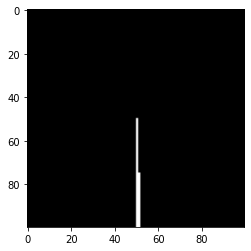

In [189]:
import math

def bresenhamLine(x0, y0, x1, y1, out):
    x = x0
    y = y0
    dX = x1 - x0
    dY = y1 - y0
    P = 2*dY-dX

    while x <= x1:
        out[x][y] = 1
        x+=1
        if P < 0:
            P+=2*dY
        else:
            P+=2*dY-2*dX
            y+=1
    return out

out = np.zeros((100,100))
for y in range(50,52):
    bresenhamLine(50,50,99,y,out)

plt.imshow(out, cmap = 'gray');



[back to index](#index)